In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("Datasets/student_kmeans_dataset.csv")

In [7]:
df.head()

,Student_ID,Study_Hours,Exam_Score
0,1,2,20
1,2,3,25
2,3,4,28
3,4,6,45
4,5,7,50


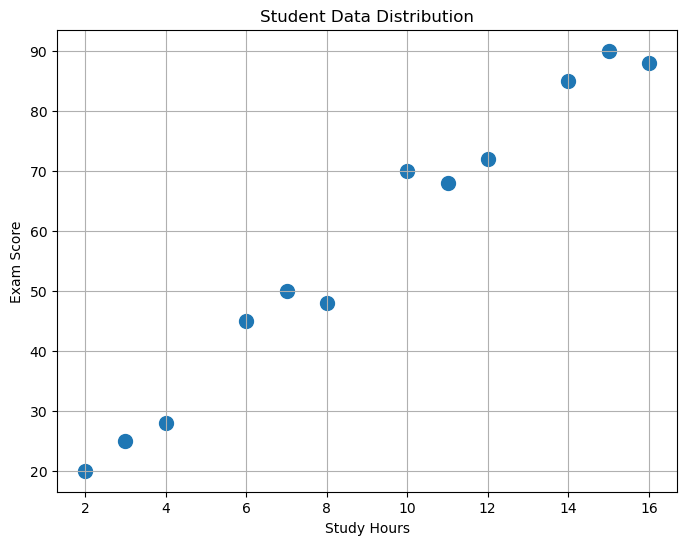

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Study_Hours"], df["Exam_Score"], s=100)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Student Data Distribution")
plt.grid(True)

In [13]:
X = df[["Study_Hours", "Exam_Score"]]

C:\Users\Sudarshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


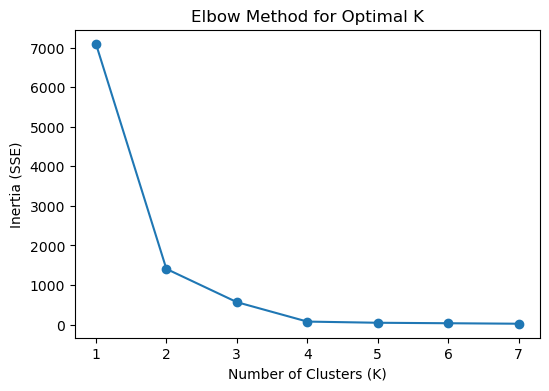

In [14]:
inertia = []
K_range = range(1, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [15]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster_3"] = kmeans_3.fit_predict(X)

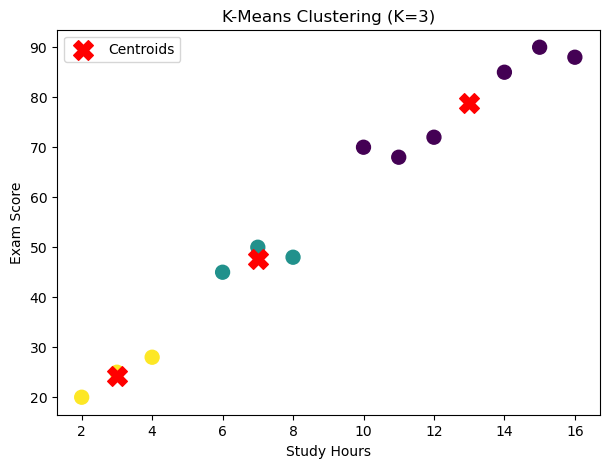

In [16]:
# Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(df["Study_Hours"], df["Exam_Score"], c=df["Cluster_3"], cmap="viridis", s=100)
plt.scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1],
            c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("K-Means Clustering (K=3)")
plt.legend()
plt.show()

In [17]:
## 6. Interpretation of Clusters
print("Cluster 0: Low study hours & low scores (struggling students)")
print("Cluster 1: Moderate study hours & average scores (average students)")
print("Cluster 2: High study hours & high scores (top performers)")


Cluster 0: Low study hours & low scores (struggling students)
Cluster 1: Moderate study hours & average scores (average students)
Cluster 2: High study hours & high scores (top performers)


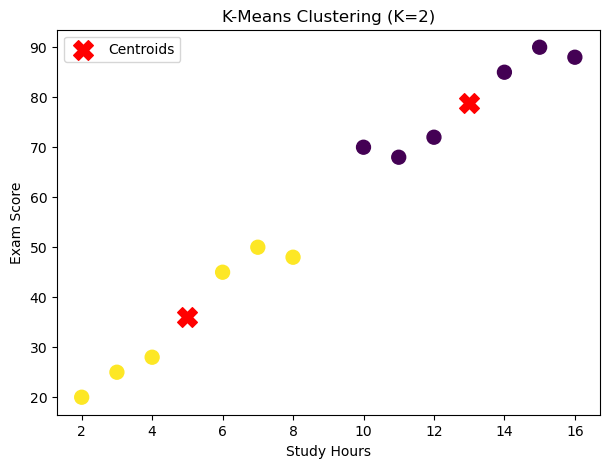

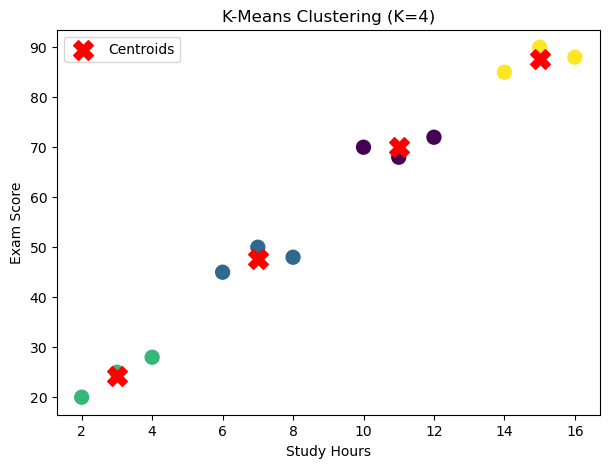

In [18]:
## 7. Compare K=2 and K=4
for k in [2,4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df[f"Cluster_{k}"] = kmeans.fit_predict(X)
    
    plt.figure(figsize=(7,5))
    plt.scatter(df["Study_Hours"], df["Exam_Score"], c=df[f"Cluster_{k}"], cmap="viridis", s=100)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                c="red", marker="X", s=200, label="Centroids")
    plt.xlabel("Study Hours")
    plt.ylabel("Exam Score")
    plt.title(f"K-Means Clustering (K={k})")
    plt.legend()
    plt.show()